# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [1]:
import matplotlib.pyplot as plt
import numpy
import random

This defines the function:

In [2]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

This plots the function:

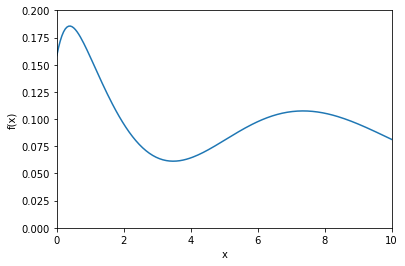

In [3]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [13]:
def genSample(npts):
    sample = []
    # YOUR CODE HERE
    def m(x):
        #return (2+(2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm
        return 0.2
    
    Hit = []
    x_Hit = []
    y_vals = []
    
    for i in range(1, npts):
        
        x = random.random()*10
        
        r = random.random()
        a = r * m(x)
        
        if a < f(x):
            
            Hit.append(a)
            x_Hit.append(x)
            sample.append(x)
            y_vals.append(f(x))
            
    while len(Hit) < npts:
        
        r = random.random()
        x = random.random()*10
        a = r * m(x)
        if a < f(x):
            Hit.append(a)
            x_Hit.append(x)
            sample.append(x)
            y_vals.append(f(x))
        
    return numpy.array(sample)

In [14]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


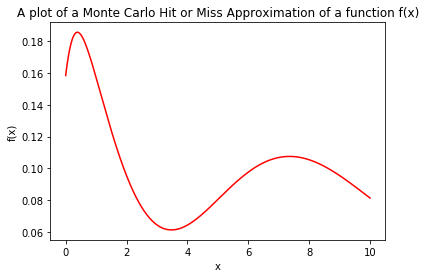

Text(0.5,1,'A histogram of the approximated f(x) against the analytical f(x) (scaled by x1.2)')

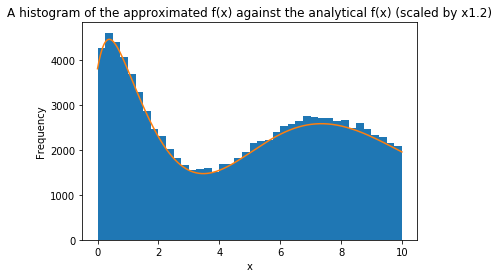

In [20]:
x = genSample(100000)
x_order = numpy.sort(x)
y_vals = f(x_order)
plt.plot(x_order, y_vals,color='r')

plt.ylabel("f(x)")
plt.xlabel("x")
plt.title("A plot of a Monte Carlo Hit or Miss Approximation of a function f(x)")

plt.show()

plt.hist(x, bins= 40)
plt.plot(xs,fs*1.2)
plt.ylabel("Frequency")
plt.xlabel("x")
plt.title("A histogram of the approximated f(x) against the analytical f(x) (scaled by x1.2)")